# Mezcla en 3 tanques — Euler hacia adelante

Implementación de **Euler Forward** para un sistema de tres tanques perfectamente mezclados.
La concentración de salida pedida es $c_{Q3}(t)=C_3(t)$.

Caudales: Q0=0.000005, Q1=0.000025, Q2=0.000030, Q3=0.000010, QA=0.000312, QB=0.000264, QC=0.000200 [m^3/s]
Condiciones iniciales: x1=20.00, x2=6.00, x3=0.00 [kg]


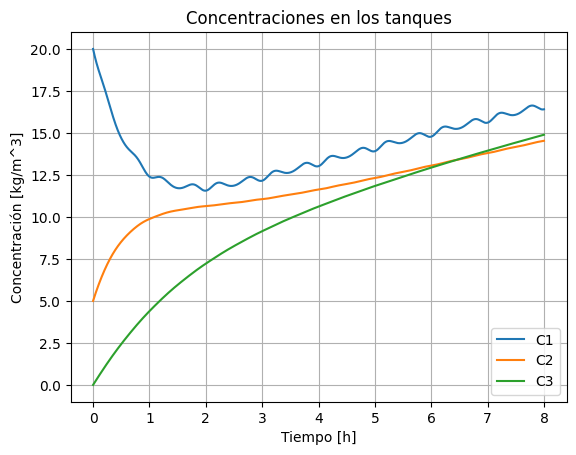

In [36]:
import numpy as np
import matplotlib.pyplot as plt

V1, V2, V3 = 1.0, 1.2, 1.5  # m^3
def Lmin_to_m3s(x):
    return (x/1000.0)/60.0

Q0 = Lmin_to_m3s(0.3)
Q1 = Lmin_to_m3s(1.5)
Q2 = Lmin_to_m3s(1.8)
Q3 = Lmin_to_m3s(0.6)
QA = Lmin_to_m3s(18.72)
QB = Lmin_to_m3s(15.84)
QC = Lmin_to_m3s(12.0)

print(f"Caudales: Q0={Q0:.6f}, Q1={Q1:.6f}, Q2={Q2:.6f}, Q3={Q3:.6f}, QA={QA:.6f}, QB={QB:.6f}, QC={QC:.6f} [m^3/s]")

def c_Q1(t):
    return 25.0 * (2.0 + np.sin(0.003491*t) + 0.3*np.sin(0.005236*t))

c_Q2 = 6.25  # kg/m^3
C1_0, C2_0, C3_0 = 20.0, 5.0, 0.0
t2o=0
t2o_end=8*3600.0
dt2=10.0
t2 = np.zeros(int(t2o_end // dt2 + 1))
for i in range(len(t2)):
    t2[i] = t2o + i*dt2
x1, x2, x3 = C1_0*V1, C2_0*V2, C3_0*V3  # m
print(f"Condiciones iniciales: x1={x1:.2f}, x2={x2:.2f}, x3={x3:.2f} [kg]")
x=np.zeros(len(t2))
y=np.zeros(len(t2))
z=np.zeros(len(t2))

x[0]=x1
y[0]=x2
z[0]=x3

def dxdt(x1, x2, x3):
    dx1dt = +Q1*c_Q1(t2[i])+Q0*0 - QA*x1/V1 + (1/2)*QB*x2/V2 + (3/4)*QC*x3/V3

    return dx1dt
def dydt(x1, x2):
    dy2dt = +(3/4)*QA*x1/V1 - QB*x2/V2 +Q2*c_Q2

    return dy2dt
def dzdt(x1, x2, x3):
    dz3dt = +(1/4)*QA*x1/V1 + (1/2)*QB*x2/V2 - QC*x3/V3 + Q3*x3/V3

    return dz3dt


for i in range(len(t2)-1):
    x[i+1]=x[i]+dxdt(x[i], y[i], z[i])*dt2
    y[i+1]=y[i]+dydt(x[i], y[i])*dt2
    z[i+1]=z[i]+dzdt(x[i], y[i], z[i])*dt2 

plt.plot(t2/3600, x/V1, label='C1')
plt.plot(t2/3600, y/V2, label='C2')
plt.plot(t2/3600, z/V3, label='C3')
plt.xlabel('Tiempo [h]')
plt.ylabel('Concentración [kg/m^3]')
plt.title('Concentraciones en los tanques')
plt.legend()
plt.grid()
plt.show()



